# Método de la bisección

La raiz es:  19.99999910593033
Se realizaron  25  iteraciones
La tabla de valores es: 
           xl       f(xl)    xu  f(xu)         xr       f(xr)      error
0  -10.000000   98.000000  20.0  398.0   5.000000   23.000000  30.000000
1    5.000000   23.000000  20.0  398.0  12.500000  154.250000  15.000000
2   12.500000  154.250000  20.0  398.0  16.250000  262.062500   7.500000
3   16.250000  262.062500  20.0  398.0  18.125000  326.515625   3.750000
4   18.125000  326.515625  20.0  398.0  19.062500  361.378906   1.875000
5   19.062500  361.378906  20.0  398.0  19.531250  379.469727   0.937500
6   19.531250  379.469727  20.0  398.0  19.765625  388.679932   0.468750
7   19.765625  388.679932  20.0  398.0  19.882812  393.326233   0.234375
8   19.882812  393.326233  20.0  398.0  19.941406  395.659683   0.117188
9   19.941406  395.659683  20.0  398.0  19.970703  396.828983   0.058594
10  19.970703  396.828983  20.0  398.0  19.985352  397.414277   0.029297
11  19.985352  397.414277  20.0  398.

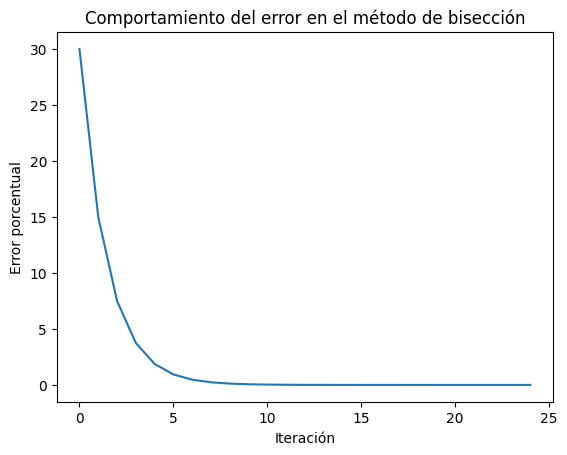

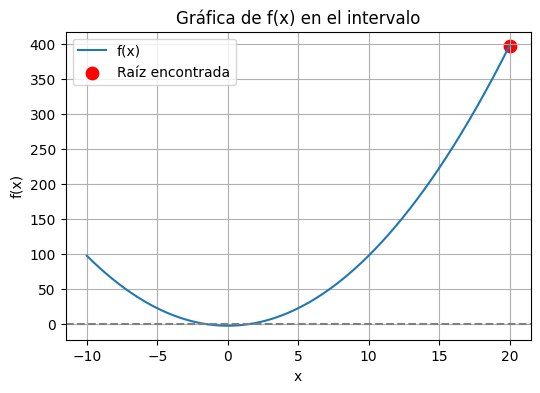

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def f(x):
  #return 3*x**2 - 120*x + 100
#  return 2*np.sin(x)-(x**2/10)
  return x**2 - 2

def biseccion(f, xl, xu, error):
  results = pd.DataFrame(columns=['xl', 'f(xl)', 'xu', 'f(xu)', 'xr', 'f(xr)', 'error']) # agregar f(xl)...
  iteraciones = 0

  xr = 0

  while abs(xu - xl) > error:
    # Calcular el error relativo porcentual
    xr = (xl + xu)/2

    results.loc[len(results)] = [xl, f(xl), xu, f(xu), xr, f(xr), abs(xu - xl)]

    if f(xr) == 0:
      results.loc[len(results)] = [xl, f(xl), xu, f(xu), xr, f(xr), 0]
      return xr, iteraciones, results
    elif f(xl)*f(xr) < 0:
      xu = xr
    else:
      xl = xr

    # Guardar los resultados de la iteracion
    iteraciones += 1


  return xr, iteraciones, results


xl = -10

xu = 20

error = 0.000001


raiz, iteraciones, df = biseccion(f, xl, xu, error)

print("La raiz es: ", raiz)
print("Se realizaron ", iteraciones, " iteraciones")
print("La tabla de valores es: ")
print(df)

plt.plot(df['error'])
plt.xlabel('Iteración')
plt.ylabel('Error porcentual')
plt.title('Comportamiento del error en el método de bisección')
plt.show()

x_vals = np.linspace(xl, xu, 2000)
y_vals = [f(x) for x in x_vals]
plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(raiz, f(raiz), color='red', s=80, label='Raíz encontrada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) en el intervalo')
plt.legend()
plt.grid(True)
plt.show()

# Metodo falsa posicion

La raiz es:  1.414213562373095
Se realizaron  23  iteraciones
La tabla de valores es: 
           xl         f(xl)   xu  f(xu)        xr         f(xr)      error
0  -20.000000  3.980000e+02  2.0    2.0  2.111111  2.456790e+00  22.000000
1    2.111111  2.456790e+00  2.0    2.0  1.513514  2.907232e-01   0.111111
2    1.513514  2.907232e-01  2.0    2.0  1.430769  4.710059e-02   0.486486
3    1.430769  4.710059e-02  2.0    2.0  1.417040  8.003378e-03   0.569231
4    1.417040  8.003378e-03  2.0    2.0  1.414698  1.370892e-03   0.582960
5    1.414698  1.370892e-03  2.0    2.0  1.414297  2.351411e-04   0.585302
6    1.414297  2.351411e-04  2.0    2.0  1.414228  4.034186e-05   0.585703
7    1.414228  4.034186e-05  2.0    2.0  1.414216  6.921512e-06   0.585772
8    1.414216  6.921512e-06  2.0    2.0  1.414214  1.187542e-06   0.585784
9    1.414214  1.187542e-06  2.0    2.0  1.414214  2.037499e-07   0.585786
10   1.414214  2.037499e-07  2.0    2.0  1.414214  3.495796e-08   0.585786
11   1.414214

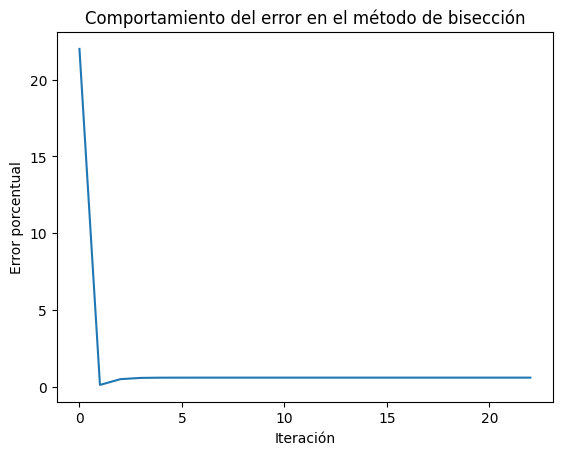

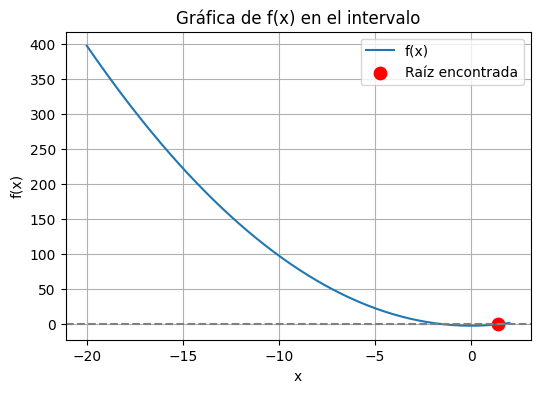

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def f(x):
  #return 3*x**2 - 120*x + 100
  return x**2-2

def falsa_posicion(f, xl, xu, error):
  results = pd.DataFrame(columns=['xl', 'f(xl)', 'xu', 'f(xu)', 'xr', 'f(xr)', 'error'])
  iteraciones = 0


  while abs(xu - xl) > error:
    # Calcular el error relativo porcentual

    if f(xl) - f(xu) == 0: 
      xu = xu + 0.1  # Ajustar xu para evitar división por cero
      iteraciones += 1
      continue

    xr = xu - ((f(xu)*(xl - xu))/(f(xl) - f(xu)))

    results.loc[len(results)] = [xl, f(xl), xu, f(xu), xr, f(xr), abs(xu - xl)]

    if f(xr) == 0:
      results.loc[len(results)] = [xl, f(xl), xu, f(xu), xr, f(xr), 0]
      return xr, iteraciones, results
    elif f(xl)*f(xr) < 0:
      xu = xr
    else:
      xl = xr

    # Guardar los resultados de la iteracion
    iteraciones += 1


  return xr, iteraciones, results


xl = -2

xu = 2

error = 0.1


raiz, iteraciones, df = falsa_posicion(f, xl, xu, error)

print("La raiz es: ", raiz)
print("Se realizaron ", iteraciones, " iteraciones")
print("La tabla de valores es: ")
print(df)

plt.plot(df['error'])
plt.xlabel('Iteración')
plt.ylabel('Error porcentual')
plt.title('Comportamiento del error en el método de bisección')
plt.show()

# Gráfica de la función f(x) para el método de falsa posición
import numpy as np
x_vals = np.linspace(xl, xu, 200)
y_vals = [f(x) for x in x_vals]
plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(raiz, f(raiz), color='red', s=80, label='Raíz encontrada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) en el intervalo')
plt.legend()
plt.grid(True)
plt.show()

# Razón dorada

La raiz es:  -10.000000000000002
Se realizaron  75  iteraciones
La tabla de valores es: 
      xl   f(xl)         xu  f(xu)         x1        f(x1)         x2  \
0  -10.0 -1200.0  10.000000  800.0   2.360680     2.009999  -2.360680   
1  -10.0 -1200.0   2.360680  800.0  -2.360680   -24.301235  -5.278640   
2  -10.0 -1200.0  -2.360680  800.0  -5.278640  -202.812365  -7.082039   
3  -10.0 -1200.0  -5.278640  800.0  -7.082039  -455.512234  -8.196601   
4  -10.0 -1200.0  -7.082039  800.0  -8.196601  -685.051203  -8.885438   
..   ...     ...        ...    ...        ...          ...        ...   
71 -10.0 -1200.0 -10.000000  800.0 -10.000000 -1200.000000 -10.000000   
72 -10.0 -1200.0 -10.000000  800.0 -10.000000 -1200.000000 -10.000000   
73 -10.0 -1200.0 -10.000000  800.0 -10.000000 -1200.000000 -10.000000   
74 -10.0 -1200.0 -10.000000  800.0 -10.000000 -1200.000000 -10.000000   
75 -10.0 -1200.0 -10.000000  800.0 -10.000000 -1200.000000 -10.000000   

          f(x2)             d  err

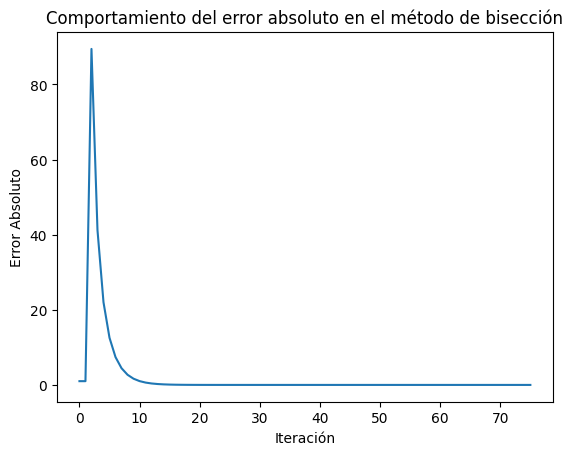

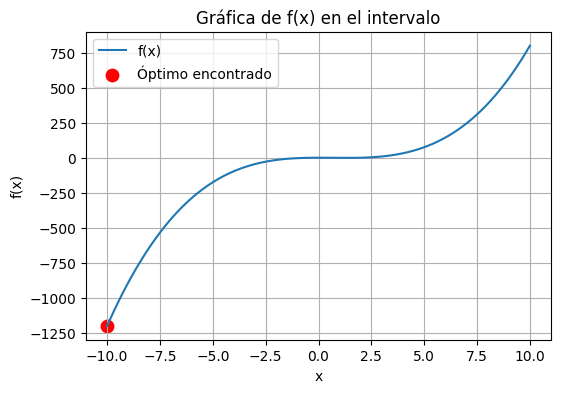

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math


def f(x):
  #return 3*x**2 - 120*x + 100
  return x**3 - 2*x**2


def razon_dorada(f, xl, xu, error, method = 'minimize'):
    results = pd.DataFrame(columns=['xl', 'f(xl)', 'xu', 'f(xu)', 'x1', 'f(x1)', 'x2', 'f(x2)', 'd', 'error_absoluto'])
    phi = (math.sqrt(5) - 1) / 2  # razón dorada conjugada
    iteraciones = 0 

    d = phi*(xu - xl)
    x1 = xl + d
    x2 = xu - d
    fx1 = f(x1)
    fx2 = f(x2)
    fxl = f(xl)
    fxu = f(xu)
    error_absoluto = abs(error) + 1

    results.loc[len(results)] = [xl, fxl, xu, fxu, x1, fx1, x2, fx2, d, error_absoluto]

    # Evaluación inicial
    if method == 'minimize':
        if fx1 < fx2:
            xopt = x1
        else:
            xopt = x2
    elif method == 'maximize':
        if fx1 > fx2:
            xopt = x1   
        else:
            xopt = x2
    else:
        raise ValueError("Método no reconocido")

    while error_absoluto > error:

        d = phi*d
        if method == 'minimize':
            if fx1 < fx2:
                xl = x2
                x2, fx2 = x1, fx1
                x1 = xl + d
                fx1 = f(x1)
            else:
                xu = x1
                x1, fx1 = x2, fx2
                x2 = xu - d
                fx2 = f(x2)

        elif method == 'maximize':
            if fx1 > fx2:   # Ojo, ahora es ">" para maximizar
                xl = x2
                x2, fx2 = x1, fx1
                x1 = xl + d
                fx1 = f(x1)
            else:
                xu = x1
                x1, fx1 = x2, fx2
                x2 = xu - d
                fx2 = f(x2)

        iteraciones += 1

        results.loc[len(results)] = [xl, fxl, xu, fxu, x1, fx1, x2, fx2, d, error_absoluto]

        # Selección de xopt depende del método
        if method == 'minimize':
            if fx1 < fx2:
                xopt = x1
            else:
                xopt = x2
        elif method == 'maximize':
            if fx1 > fx2:
                xopt = x1
            else:
                xopt = x2

        if xopt != 0:
            error_absoluto = (1-phi)*abs((xu - xl)/xopt)*100

    return xopt, iteraciones, results


xl = -10

xu = 10

error = 0

raiz, iteraciones, df = razon_dorada(f, xl, xu, error, method='minimize')

print("La raiz es: ", raiz)
print("Se realizaron ", iteraciones, " iteraciones")
print("La tabla de valores es: ")
print(df)

plt.plot(df['error_absoluto'])
plt.xlabel('Iteración')
plt.ylabel('Error Absoluto')
plt.title('Comportamiento del error absoluto en el método de bisección')
plt.show()

# Gráfica de la función f(x) para el método de razón dorada
import numpy as np
x_vals = np.linspace(xl, xu, 200)
y_vals = [f(x) for x in x_vals]
plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(raiz, f(raiz), color='red', s=80, label='Óptimo encontrado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) en el intervalo')
plt.legend()
plt.grid(True)
plt.show()


# Interpolacion cuadratica

El mínimo está en x = 1.3333588915329055
f(x) mínimo = -1.1851851838787257
Iteraciones realizadas: 9

Tabla de iteraciones:
         x0        x1        x2        x3       f(x3)  error_x0  error_x1  \
0 -1.000000  1.100000  2.000000 -4.500000 -131.625000  3.500000  5.600000   
1  1.100000 -4.500000  2.000000  1.727941   -0.812308  0.627941  6.227941   
2  1.100000  1.727941 -4.500000  1.473969   -1.142847  0.373969  0.253972   
3  1.727941  1.473969 -4.500000  1.798263   -0.652368  0.070321  0.324294   
4  1.727941  1.798263  1.473969  1.384055   -1.179909  0.343886  0.414208   
5  1.798263  1.384055  1.473969  1.351423   -1.184525  0.446840  0.032632   
6  1.384055  1.351423  1.473969  1.335731   -1.185174  0.048324  0.015692   
7  1.351423  1.335731  1.473969  1.334010   -1.185184  0.017413  0.001721   
8  1.335731  1.334010  1.473969  1.333435   -1.185185  0.002296  0.000575   
9  1.334010  1.333435  1.473969  1.333359   -1.185185  0.000651  0.000076   

   error_x2  error_min  
0  

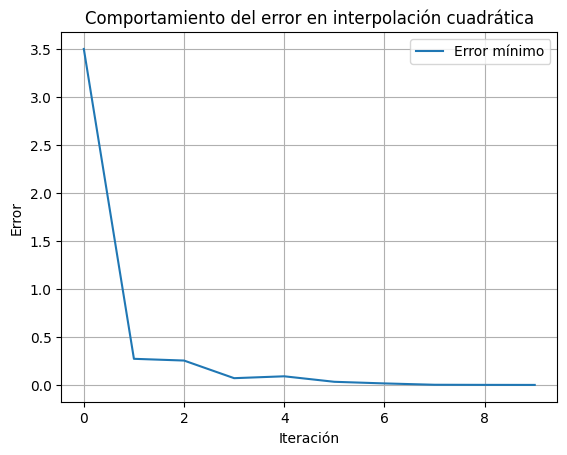

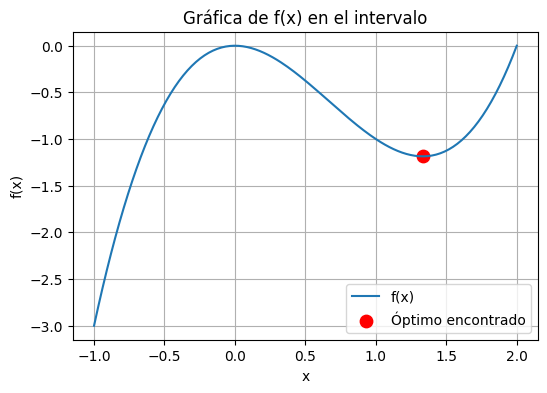

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Función objetivo
def f(x):
  #return 3*x**2 - 120*x + 100
  return x**3 - 2*x**2


def interpolacion_cuadratica(f, x0, x1, x2, error, method = 'minimize'):
    results = pd.DataFrame(columns=['x0', 'x1', 'x2', 'x3', 'f(x3)', 
                                     'error_x0', 'error_x1', 'error_x2', 'error_min'])
    iteraciones = 0
    x3 = None

    while True:
        f0, f1, f2 = f(x0), f(x1), f(x2)

        # Fórmula de interpolación cuadrática
        num = (f0 * (x1**2 - x2**2) + f1 * (x2**2 - x0**2) + f2 * (x0**2 - x1**2))
        den = (2 * (f0*(x1 - x2) + f1*(x2 - x0) + f2*(x0 - x1)))

        if den == 0:
            print("Error: denominador cero")
            break

        x3 = num / den
        f3 = f(x3)

        # Errores individuales y el mínimo
        error_x0 = abs(x3 - x0)
        error_x1 = abs(x3 - x1)
        error_x2 = abs(x3 - x2)
        error_min = min(error_x0, error_x1, error_x2)

        # Guardar datos en el DataFrame
        results.loc[len(results)] = [x0, x1, x2, x3, f3, error_x0, error_x1, error_x2, error_min]

        # Verificar condición de parada
        if error_min < error:
            break

        # Actualizar los puntos
        if method == 'maximize':  # Mantener el valor más alto
            if f3 > f1:
                x0 = x1
                x1 = x3
            else:
                x2 = x1
                x1 = x3
        elif method == 'minimize':  # Mantener el valor más bajo
            if f3 < f1:
                x0 = x1
                x1 = x3
            else:
                x2 = x1
                x1 = x3
        else:
            raise ValueError("Método no reconocido")

        iteraciones += 1

    return x3, f3, iteraciones, results


# --- Ejemplo ---
x0 = -1
x1 = 1.1
x2 = 2
error = 0.0001

method = 'minimize'

max_x, max_fx, iteraciones, df = interpolacion_cuadratica(f, x0, x1, x2, error, method=method)

if method == 'minimize':
    print("El mínimo está en x =", max_x)
    print("f(x) mínimo =", max_fx)
else:
    print("El máximo está en x =", max_x)
    print("f(x) máximo =", max_fx)

print("Iteraciones realizadas:", iteraciones)
print("\nTabla de iteraciones:")
print(df)

# # Graficar el error mínimo
plt.plot(df['error_min'], label='Error mínimo')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Comportamiento del error en interpolación cuadrática')
plt.grid(True)
plt.legend()
plt.show()


# Gráfica de la función f(x) para el método de interpolación cuadrática
import numpy as np
x_vals = np.linspace(min(x0, x1, x2), max(x0, x1, x2), 200)
y_vals = [f(x) for x in x_vals]
plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(max_x, f(max_x), color='red', s=80, label='Óptimo encontrado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) en el intervalo')
plt.legend()
plt.grid(True)
plt.show()

# Newton-Raphson

La raíz es: 3.141592653589793
Número de iteraciones: 6
   Iteración         x          f(x)     f'(x)         Error
0        0.0  2.000000  9.092974e-01 -0.416147  2.185040e+00
1        1.0  4.185040 -8.641441e-01 -0.503244  1.717146e+00
2        2.0  2.467894  6.238811e-01 -0.781519  7.982926e-01
3        3.0  3.266186 -1.242715e-01 -0.992248  1.252424e-01
4        4.0  3.140944  6.487412e-04 -1.000000  6.487414e-04
5        5.0  3.141593 -9.101108e-11 -1.000000  9.101120e-11


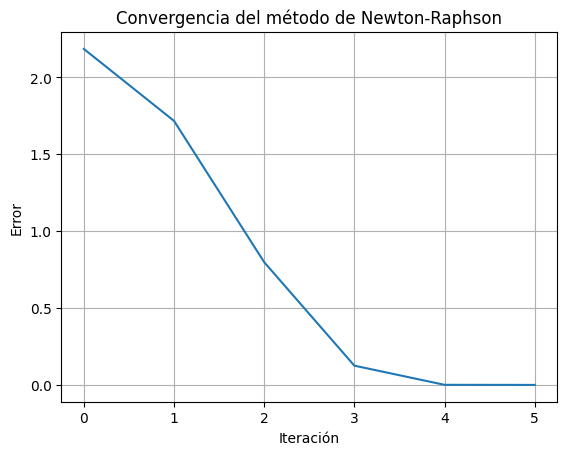

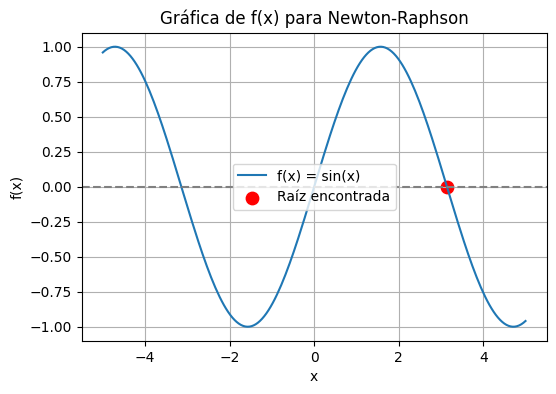

In [ ]:
import sympy as sp

def f(x):
    # Define the function: f(x) = sin(x)
    f = sp.sin(x)

    return f

def newton_raphson(f, df, x0, error, max_iter=100):
    results = pd.DataFrame(columns=['Iteración', 'x', 'f(x)', "f'(x)", 'Error'])
    iteraciones = 0
    x = x0
    error_actual = float('inf')

    while error_actual > error and iteraciones < max_iter:
        fx = f(x)
        dfx = df(x)

        if dfx == 0:
            print("Derivada cero. No se puede continuar.")
            break

        x_new = x - fx / dfx
        error_actual = abs(x_new - x)

        results.loc[len(results)] = [iteraciones, x, fx, dfx, error_actual]

        x = x_new
        iteraciones += 1

    return x, iteraciones, results

# Define the function and its derivative
x = sp.Symbol('x')
f_sym = f(x)
df_sym = sp.diff(f_sym, x)

x, iteraciones, df = newton_raphson(sp.lambdify(x, f_sym), sp.lambdify(x, df_sym), x0=2, error=0.0001)
print("La raíz es:", x)
print("Número de iteraciones:", iteraciones)
print(df)

# Gráfica del error
plt.plot(df["Iteración"], df["Error"])
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Convergencia del método de Newton-Raphson")
#plt.yscale("log")  # Escala logarítmica para ver mejor la convergencia
plt.grid(True)
plt.show()

# Gráfica de la función f(x) para el método Newton-Raphson
import numpy as np
x_vals = np.linspace(-5, 5, 200)
y_vals = [sp.sin(x) for x in x_vals]
plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals, label='f(x) = sin(x)')
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(x, sp.sin(x), color='red', s=80, label='Raíz encontrada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) para Newton-Raphson')
plt.legend()
plt.grid(True)
plt.show()

# Newton

Mínimo global aproximado: x = 6.28318 f(x) = -4.283185307179586

Tabla de iteraciones:
    Iteración         x         f'(x)    f''(x)     Error
0           0  5.000000 -7.163378e-01  0.958924  0.747022
1           1  5.747022 -1.403249e-01  0.510841  0.274694
2           2  6.021716 -3.398877e-02  0.258500  0.131485
3           3  6.153201 -8.436119e-03  0.129619  0.065084
4           4  6.218285 -2.105309e-03  0.064855  0.032462
5           5  6.250746 -5.260962e-04  0.032433  0.016221
6           6  6.266967 -1.315096e-04  0.016217  0.008109
7           7  6.275076 -3.287651e-05  0.008109  0.004054
8           8  6.279131 -8.219071e-06  0.004054  0.002027
9           9  6.281158 -2.054764e-06  0.002027  0.001014
10         10  6.282172 -5.136909e-07  0.001014  0.000507
11         11  6.282679 -1.284227e-07  0.000507  0.000253
12         12  6.282932 -3.210567e-08  0.000253  0.000127
13         13  6.283059 -8.026418e-09  0.000127  0.000063
14         14  6.283122 -2.006605e-09  0.00

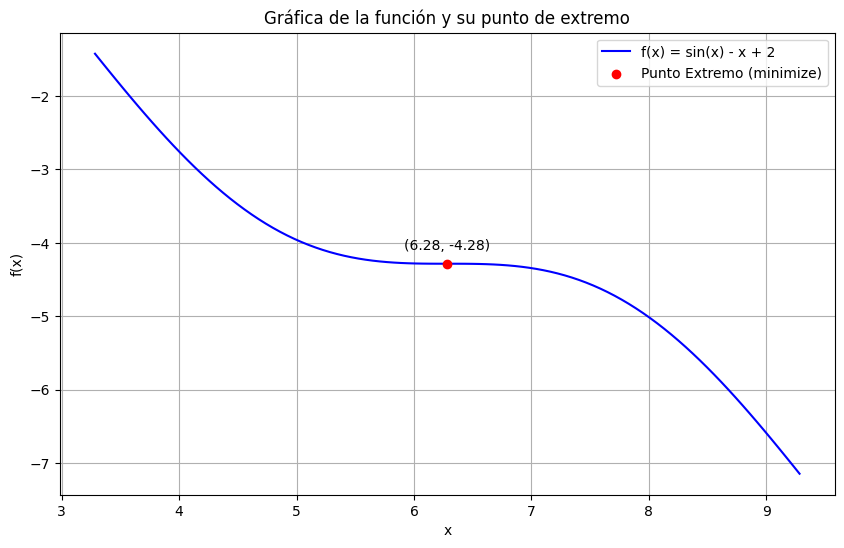

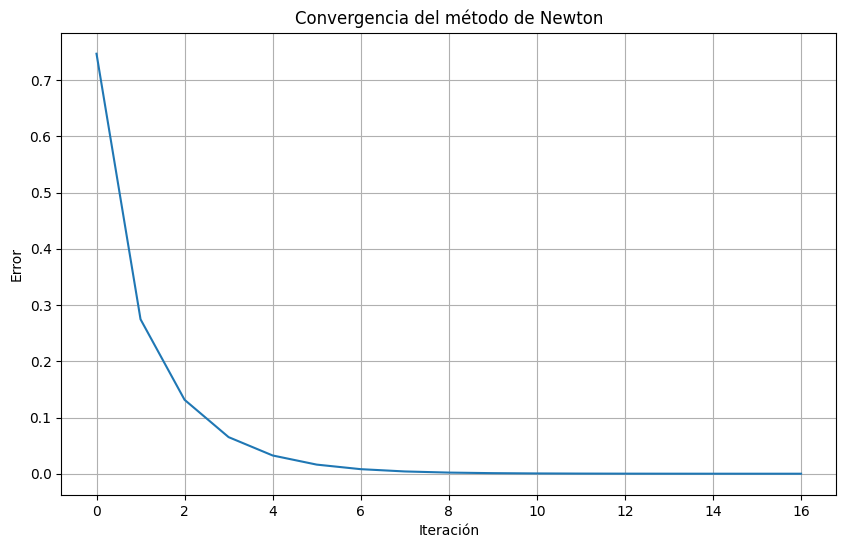

In [22]:
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import numpy as np

# Definir la función simbólica
x = sp.Symbol('x')
f_sym = sp.sin(x) - x + 2
df_sym = sp.diff(f_sym, x)
ddf_sym = sp.diff(df_sym, x)

# Funciones numéricas
f_num = sp.lambdify(x, f_sym, 'numpy')
df_num = sp.lambdify(x, df_sym, 'numpy')
ddf_num = sp.lambdify(x, ddf_sym, 'numpy')

def newton(df, ddf, x0, error=1e-5, max_iter=100):
    """Método de Newton para encontrar un punto crítico"""
    x = x0
    iteraciones = []
    for i in range(max_iter):
        dfx = df(x)
        ddfx = ddf(x)
        if ddfx == 0:
            return None, None  # evitar división entre cero
        x_new = x - dfx/ddfx
        err = abs(x_new - x)
        iteraciones.append([i, x, dfx, ddfx, err])
        if err < error:
            tabla = pd.DataFrame(iteraciones, columns=["Iteración", "x", "f'(x)", "f''(x)", "Error"])
            return x_new, tabla
        x = x_new
    tabla = pd.DataFrame(iteraciones, columns=["Iteración", "x", "f'(x)", "f''(x)", "Error"])
    return None, tabla

def evaluar_punto(x0):
    """Corre Newton desde x0 y devuelve (x*, f(x*), tabla) si converge"""
    x_star, tabla = newton(df_num, ddf_num, x0)
    if x_star is None:
        return None
    return (float(x_star), float(f_num(x_star)), tabla)

def buscar_extremos(x0, vecinos=5, method='maximize'):
    """Busca máximos y mínimos desde x0 y puntos vecinos"""
    puntos_iniciales = [x0 + i for i in range(-vecinos, vecinos+1) if i != 0]
    puntos_iniciales.append(x0)

    resultados = []
    with ThreadPoolExecutor() as executor:
        for r in executor.map(evaluar_punto, puntos_iniciales):
            if r is not None:
                resultados.append(r)

    # Eliminar duplicados aproximados
    resultados_unicos = {}
    tablas = {}
    for xi, fi, tabla in resultados:
        xi_red = round(xi, 5)
        if xi_red not in resultados_unicos:
            resultados_unicos[xi_red] = fi
            tablas[xi_red] = tabla

    # Ordenar por f(x)
    resultados_ordenados = sorted(resultados_unicos.items(), key=lambda t: t[1])

    if method == 'maximize':
        resultado = resultados_ordenados[-1]
    elif method == 'minimize':
        resultado = resultados_ordenados[0]
    else:
        raise ValueError("Método no reconocido")

    x_opt = resultado[0]
    f_opt = resultado[1]
    return x_opt, f_opt, tablas[x_opt]

# Ejemplo desde x0 = 4
xi = 4
method = 'minimize'
x_opt, f_opt, tabla = buscar_extremos(xi, vecinos=5, method=method)

# Mostrar resultados
if method == 'maximize':
    print("Máximo global aproximado: x =", x_opt, "f(x) =", f_opt)
else:
    print("Mínimo global aproximado: x =", x_opt, "f(x) =", f_opt)

print("\nTabla de iteraciones:")
print(tabla)

# --- INICIO DE CÓDIGO AGREGADO PARA GRAFICAR LA FUNCIÓN Y EL PUNTO ---

# Generar datos para la gráfica
rango_x = np.linspace(x_opt - 3, x_opt + 3, 100)
rango_y = f_num(rango_x)

# Graficar la función y el punto crítico
plt.figure(figsize=(10, 6))
plt.plot(rango_x, rango_y, label='f(x) = sin(x) - x + 2', color='blue')
plt.scatter(x_opt, f_opt, color='red', zorder=5, label=f'Punto Extremo ({method})')
plt.annotate(f'({x_opt:.2f}, {f_opt:.2f})', (x_opt, f_opt), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Gráfica de la función y su punto de extremo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# --- FIN DEL CÓDIGO AGREGADO ---

# Gráfica del error
plt.figure(figsize=(10, 6))
plt.plot(tabla["Iteración"], tabla["Error"])
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Convergencia del método de Newton")
#plt.yscale("log")  # Escala logarítmica para ver mejor la convergencia
plt.grid(True)
plt.show()


# Busqueda aleatoria

El mínimo está en x = 0.0002, y = 1.6608
f(x,y) mínimo = -4522.6458

Tabla de iteraciones (últimas 10):
         iter         x         y     f(x,y)
9990   9991.0 -0.141780  1.798306   7.598000
9991   9992.0  1.593946  1.362844  -9.756269
9992   9993.0  0.720610  1.428061  -4.208621
9993   9994.0 -0.852003  2.805581   3.429547
9994   9995.0  1.674138  1.698656 -11.747853
9995   9996.0  0.617813  2.727874  -6.714552
9996   9997.0 -1.884171  2.162492   1.328296
9997   9998.0  1.305381  2.876558 -12.860445
9998   9999.0 -0.218223  1.805242   5.345132
9999  10000.0 -0.445809  2.515057   3.416905


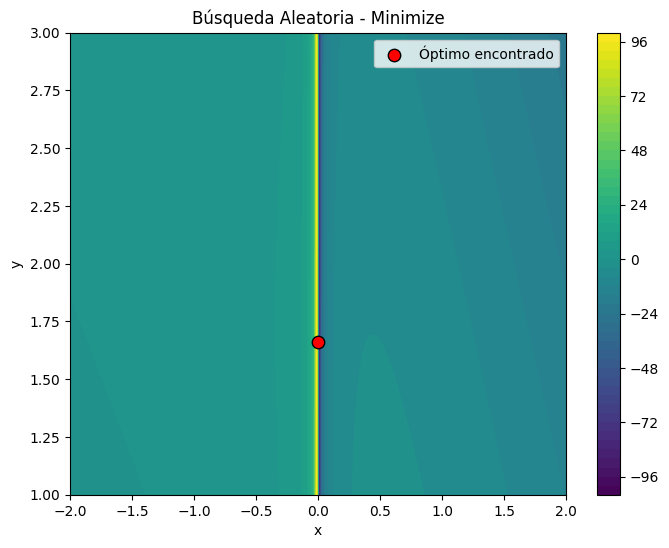

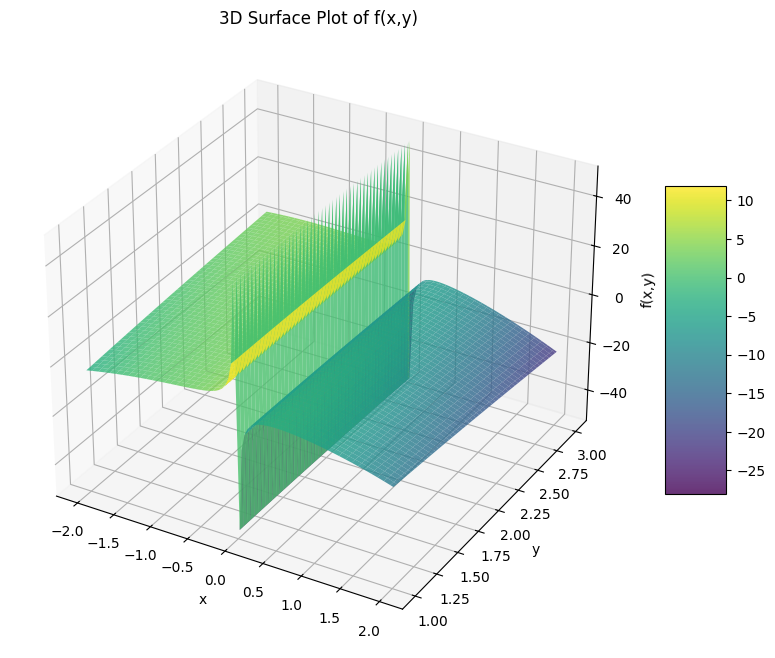

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo
def f(x, y):
    return np.sin(y) - x**(-1) - 2*x**2 - 2*x*y - y**1/2

def busqueda_aleatoria(f, xl, xu, yl, yu, n_iter, method="maximize"):
    results = pd.DataFrame(columns=["iter", "x", "y", "f(x,y)"])
    best_f = None
    best_x, best_y = None, None

    for i in range(1, n_iter+1):
        # Generar valores aleatorios dentro del rango
        x = xl + (xu - xl) * np.random.rand()
        y = yl + (yu - yl) * np.random.rand()
        val = f(x, y)

        # Guardar resultados
        results.loc[len(results)] = [i, x, y, val]

        # Verificar mejor valor según el método
        if best_f is None:
            best_f, best_x, best_y = val, x, y
        else:
            if method == "maximize" and val > best_f:
                best_f, best_x, best_y = val, x, y
            elif method == "minimize" and val < best_f:
                best_f, best_x, best_y = val, x, y

    return best_x, best_y, best_f, results


# --- Ejemplo ---
xl, xu = -2, 2
yl, yu = 1, 3
n_iter = 10000

# Cambiar entre 'maximize' o 'minimize'
method = "minimize"

best_x, best_y, best_f, df = busqueda_aleatoria(f, xl, xu, yl, yu, n_iter, method)

if method == "maximize":
    print(f"El máximo está en x = {best_x:.4f}, y = {best_y:.4f}")
    print(f"f(x,y) máximo = {best_f:.4f}")
else:
    print(f"El mínimo está en x = {best_x:.4f}, y = {best_y:.4f}")
    print(f"f(x,y) mínimo = {best_f:.4f}")

print("\nTabla de iteraciones (últimas 10):")
print(df.tail(10))


# --- Gráfica ---
X = np.linspace(xl, xu, 200)
Y = np.linspace(yl, yu, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

plt.figure(figsize=(8,6))
cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(cp)
plt.scatter(best_x, best_y, color="red", s=80, edgecolors="black", label="Óptimo encontrado")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Búsqueda Aleatoria - {method.capitalize()}")
plt.legend()
plt.show()


def plot_3d_function(x_values, y_values, function_values, title="Graph of f(x,y)"):
    """
    Create a 3D surface plot of a function f(x,y).
    
    Args:
        x_values (numpy.ndarray): 1D array of x-axis values.
        y_values (numpy.ndarray): 1D array of y-axis values.
        function_values (numpy.ndarray): 2D array of function values f(x,y).
        title (str, optional): Title for the plot. Defaults to "Graph of f(x,y)".
    
    Returns:
        None: Displays the 3D plot.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create meshgrid for 3D plotting
    X, Y = np.meshgrid(x_values, y_values)
    
    # Plot the surface
    surf = ax.plot_surface(X, Y, function_values, cmap='viridis', 
                          edgecolor='none', alpha=0.8)
    
    # Add labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title(title)
    
    # Add a color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    plt.show()

# Define x and y ranges
x = np.linspace(-2, 2, 100)
y = np.linspace(1, 3, 100)

# Create meshgrid and calculate function values
X, Y = np.meshgrid(x, y)
Z = f(X, Y)  # Assuming fxy can handle 2D array inputs

# Create the 3D plot
plot_3d_function(x, y, Z, title='3D Surface Plot of f(x,y)')
